In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rh_0 = lambda x: 0.1*(x<0)+0.9*(x>1)+(0.1+0.8*x)*(x>=0)*(x<=1) 
h = 0.02
k = 0.01
n = 1000
x_list = np.arange(-2,2+h,h)

def f(rho):
    return rho - rho**3

def Godunov(f,u_0,N):
    u = np.zeros((len(u_0),N+1))
    u[:,0] = u_0
    for n in range(N):       
        R = np.roll(u[:,n],-1)
        R[-1] = u[-1,n]
        F1 = np.zeros(len(u[:,n]))
        for i in range(len(u[:,n])):
            u_l = u[i,n]
            u_r = R[i]
            if u_l>u_r:
                if u_r < 1/np.sqrt(3) and u_l > 1/np.sqrt(3):
                    F1[i] = f(1/np.sqrt(3))
                else:
                    F1[i] = max(f(u_l),f(u_r))          
            else:
                if u_l < -1/np.sqrt(3) and u_r > -1/np.sqrt(3):
                    F1[i] = f(-1/np.sqrt(3))
                else:
                    F1[i] = min(f(u_l),f(u_r))
        F2 = np.roll(F1,1)
        F2[0] = f(u[0,n])
        u[:,n+1] = u[:,n] - k/h*(F1 - F2)

    return u

sol = Godunov(f,rh_0(x_list), n)

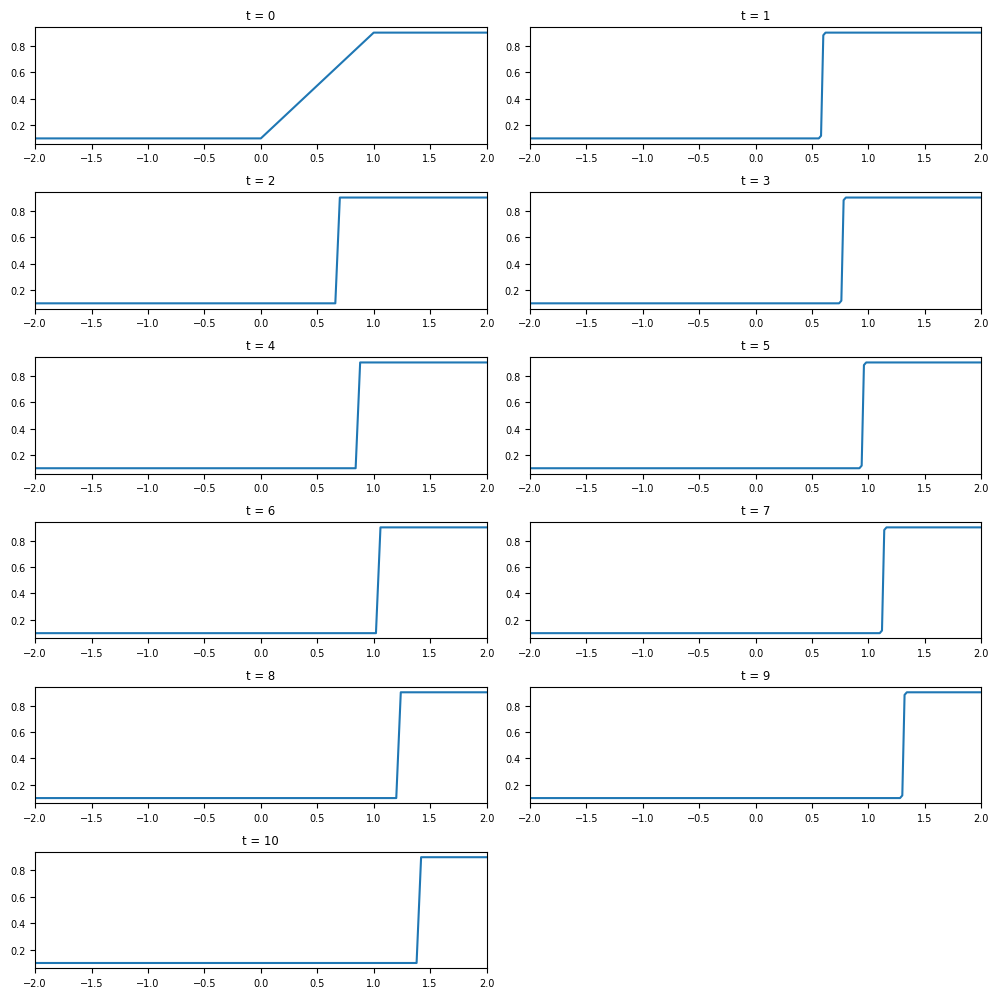

In [21]:
fig, ax = plt.subplots(6,2,figsize=(10,10))
num_steps = round(10/k)

for i in range(11):
    id = round((i) * num_steps / 10)
    ax[i//2, i%2].plot(x_list, (sol[:, id]))
    ax[i//2, i%2].set_xlim(-2,2)
    ax[i//2, i%2].set_title("t = " + str(i))
    
fig.delaxes(ax[5,1])
plt.tight_layout()